1. What question(s) are you trying to solve (or prove wrong)?

    Is there any corelation between Year Published, Minimum Number of Players, Maximum Number of Players, Playing Time, Average Complexity, Domains with Average Rating and BGG Rank?

    - Year vs Rating: Classic vs Modern
    - Min/Max (Avg) number of Players vs Rating
    - Playing Time vs Rating
    - Complexity vs Rating
    - Domians vs Rating

    Further:
    
    - Year vs Playing Time
    - Year vs Complexity
    - Min/Max (Avg) number vs Playing Time
    - Min/Max (Avg) number vs Complexity


2. What kind of data do you have and how do you treat different types?

    a. Qualitative data: 
        - Nominal: Domains
    b. Quantitative data:
        - Discrete: Year Published, Minimum Number of Players, Maximum Number of Players, BGG Rank
        - Continous: Playing Time, Average Complexity,  Average Rating


3. What’s missing from the data and how do you deal with it?

    Some factual data can be obtained from internet, such as Year Published and Minimum Number of Players.


4. Where are the outliers and why should you care about them?
  
  
5. How can you add, change or remove features to get more out of your data?

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [271]:
data_path = "dataset/BGG_Data_Set.csv"
df = pd.read_csv(data_path, encoding = 'ISO-8859-1')


In [272]:
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


In [274]:
df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [275]:
df.isna().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [276]:
#ID and Mechanics(Too many groups) are useless in our analysis
df = df.drop(columns = ["ID", "Mechanics"])    

In [277]:
df.head()

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Domains
0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Strategy Games, Thematic Games"
1,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Strategy Games, Thematic Games"
2,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,Strategy Games
3,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,Strategy Games
4,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Strategy Games, Thematic Games"


In [278]:
df.sort_values(by = "Year Published").head()

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Domains
8174,Senet,-3500.0,2,2,30,6,664,5.82,8176,1.48,1343.0,Abstract Games
1275,Backgammon,-3000.0,2,2,30,8,11680,6.54,1276,2.02,17747.0,Abstract Games
20219,Marbles,-3000.0,1,0,10,4,473,4.69,20221,1.10,399.0,Children's Games
8924,The Royal Game of Ur,-2600.0,2,2,30,10,549,5.90,8926,1.31,1162.0,Abstract Games
172,Go,-2200.0,2,2,180,8,14843,7.64,173,4.00,20398.0,Abstract Games


In [279]:
#From data above, we found the min of Year is -3500, so we want to explore them
df_year = df.groupby("Year Published").count()
df_year.head()

,Name,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Domains
Year Published,,,,,,,,,,,
-3500.0,1,1,1,1,1,1,1,1,1,1,1
-3000.0,2,2,2,2,2,2,2,2,2,2,2
-2600.0,1,1,1,1,1,1,1,1,1,1,1
-2200.0,1,1,1,1,1,1,1,1,1,1,1
-1400.0,2,2,2,2,2,2,2,2,2,2,2


In [280]:
#To check the distribution of century published
df['century'] = ((df['Year Published'] - 1) // 100)+ 1
df_century = df.groupby("century").count()
df_century.head(30)

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Domains
century,,,,,,,,,,,,
-35.0,1,1,1,1,1,1,1,1,1,1,1,1
-30.0,2,2,2,2,2,2,2,2,2,2,2,2
-26.0,1,1,1,1,1,1,1,1,1,1,1,1
-22.0,1,1,1,1,1,1,1,1,1,1,1,1
-14.0,2,2,2,2,2,2,2,2,2,2,2,2
-13.0,1,1,1,1,1,1,1,1,1,1,1,1
-2.0,1,1,1,1,1,1,1,1,1,1,1,1
-1.0,1,1,1,1,1,1,1,1,1,1,1,1
0.0,185,185,185,185,185,185,185,185,185,185,185,54


In [281]:
df = df.drop(df[df["Year Published"] <= 1900].index)


In [282]:
df.describe()

,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,century
count,20043.000000,20044.000000,20044.000000,20044.000000,20044.000000,20044.000000,20044.000000,20044.000000,20044.000000,20021.000000,20043.000000
mean,2006.382727,2.018459,5.656805,92.142736,9.644831,842.875773,6.410953,10124.016464,1.995618,1415.229909,20.762461
std,13.634828,0.688722,15.275481,549.437741,3.620545,3524.623920,0.927879,5860.101353,0.848949,5060.645693,0.425586
min,1903.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,3.000000,20.000000
25%,2001.000000,2.000000,4.000000,30.000000,8.000000,56.000000,5.820000,5048.750000,1.330000,148.000000,21.000000
50%,2011.000000,2.000000,4.000000,45.000000,10.000000,121.000000,6.430000,10104.500000,2.000000,313.000000,21.000000
75%,2016.000000,2.000000,6.000000,90.000000,12.000000,387.000000,7.030000,15190.250000,2.550000,869.000000,21.000000
max,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.540000,20342.000000,5.000000,155312.000000,21.000000


<Axes: ylabel='Year Published'>

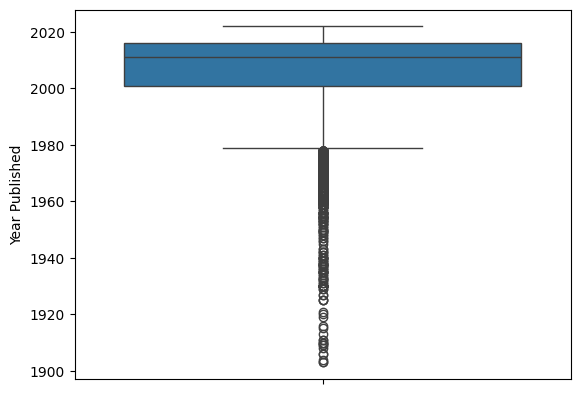

In [283]:
sns.boxplot(data = df, y = "Year Published")

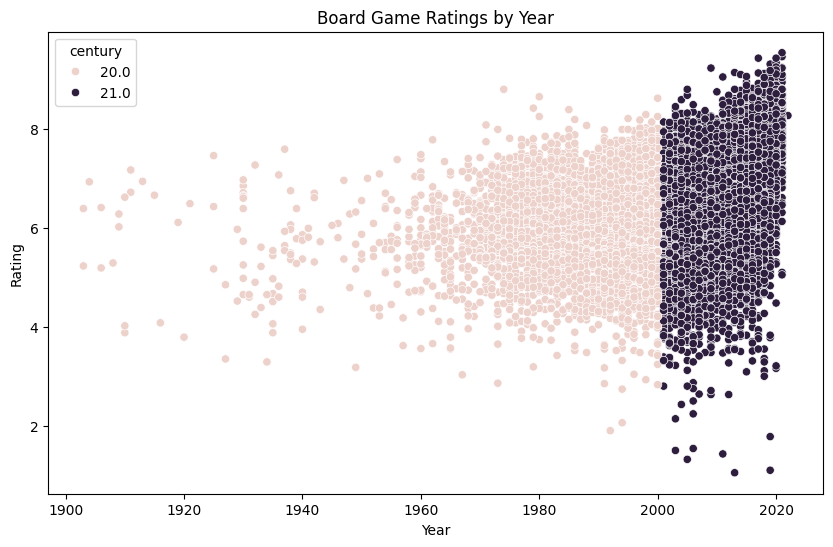

In [285]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Published', y='Rating Average', hue='century', data=df)
plt.title('Board Game Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [286]:
correlation = df['Year Published'].corr(df['Rating Average'])
print(f'Correlation between year and rating: {correlation}')

Correlation between year and rating: 0.3318521200993373
